# **LETSGROWMORE**
#**MUHAMMAD JAHANGIR**
#**Stock Market Prediction and Forcasting using LSTM**
Language = **Python**

# Stock Price Prediction and Forecasting using Stacked LSTM

If you're interested in predicting stock prices, Stacked LSTM is a powerful tool that can help. This deep-learning model analyzes historical stock price data to make predictions about future movements. By using multiple LSTM layers, the Stacked LSTM architecture is able to capture complex patterns and dependencies in the stock market data. This leads to more accurate forecasts, which can help you make better investment decisions.

### Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Loading the Dataset
Here we are making use of Tata's stock price values

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [ ]:
df.shape

(2035, 8)

In [ ]:
# sorting the data in ascending order of date
df = df.sort_values(by='Date')
df = df.reset_index()

In [ ]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [ ]:
df.tail()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2034,0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 2035 non-null   int64  
 1   Date                  2035 non-null   object 
 2   Open                  2035 non-null   float64
 3   High                  2035 non-null   float64
 4   Low                   2035 non-null   float64
 5   Last                  2035 non-null   float64
 6   Close                 2035 non-null   float64
 7   Total Trade Quantity  2035 non-null   int64  
 8   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 143.2+ KB


In [ ]:
df.describe()

,index,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,1017.000000,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,587.598219,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,0.000000,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,508.500000,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,1017.000000,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,1525.500000,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,2034.000000,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


### Data Preprocessing

In [ ]:
close_prices = df['Close']
close_prices

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

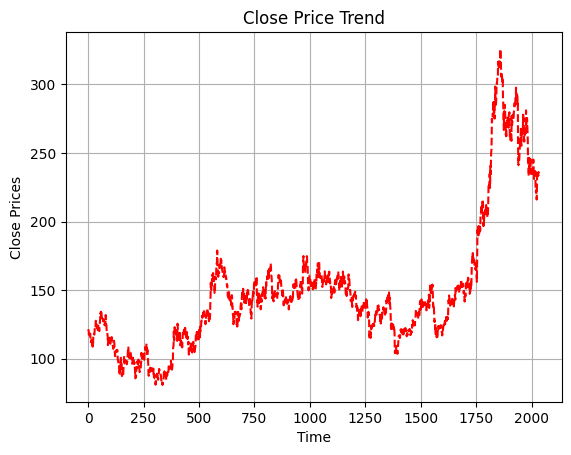

In [ ]:
# Plot the close prices in blue with dashed line style
plt.plot(close_prices, color='red', linestyle='dashed')
plt.title("Close Price Trend")
plt.xlabel("Time")
plt.ylabel("Close Prices")
plt.grid(True)  # Add grid lines for better visualization
plt.show()


Since LSTM is sensitive to the scale of the data, we apply the MinMax scaler here to get the values in the range of 0-1

In [ ]:
close_prices

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
close_prices = scaler.fit_transform(np.array(close_prices).reshape(-1,1))

In [ ]:
close_prices

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

### Splitting the data into train and test sets

In [ ]:
training_size = int(len(close_prices) * 0.7)
testing_size = len(close_prices) - training_size
training_size, testing_size

(1424, 611)

In [ ]:
train_data = close_prices[0:training_size, :]
test_data = close_prices[training_size:len(close_prices), :1]

Here, we are converting the given 1 dimensional into a matrix. Here, we choose a time_step, which decides the number of values to be used as input features. So, for a particular index i, **i to i + time_step-1** is taken as the input feature, and **i + time_step** is taken as the output.

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ### i = 0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
X_train.shape, y_train.shape

((1323, 100), (1323,))

In [ ]:
X_test.shape, y_test.shape

((510, 100), (510,))

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### Making the Stacked LSTM model
The model in this scenario was trained with the following configurations:

1. Number of LSTM layers: 4
2. Loss Function: Mean Square Error
3. Optimizer: Adam
4. Number of Epochs: 100
5. Batch size: 64

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 13s 300ms/step - loss: 0.0099 - val_loss: 0.0167
Epoch 2/100
21/21 [==============================] - 4s 210ms/step - loss: 0.0019 - val_loss: 0.0038
Epoch 3/100
21/21 [==============================] - 6s 285ms/step - loss: 8.9206e-04 - val_loss: 0.0029
Epoch 4/100
21/21 [==============================] - 5s 221ms/step - loss: 8.2816e-04 - val_loss: 0.0036
Epoch 5/100
21/21 [==============================] - 5s 247ms/step - loss: 8.0281e-04 - val_loss: 0.0030
Epoch 6/100
21/21 [==============================] - 5s 227ms/step - loss: 7.7890e-04 - val_loss: 0.0033
Epoch 7/100
21/21 [==============================] - 4s 213ms/step - loss: 7.5804e-04 - val_loss: 0.0039
Epoch 8/100
21/21 [==============================] - 6s 289ms/step - loss: 7.4181e-04 - val_loss: 0.0027
Epoch 9/100
21/21 [==============================] - 4s 202ms/step - loss: 7.0029e-04 - val_loss: 0.0036
Epoch 10/100
21/21 [==============================] - 4s 197ms

In [ ]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

16/16 [==============================] - 1s 38ms/step


Inverse transform is done to convert the data back to its original form

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

### Calculate RMSE performance metrics

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
math.sqrt(mean_squared_error(y_train,train_predict))

133.2154445865135

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

210.31685185706533

### Plotting the :
actual close prices,
train predictions,
test predictions.

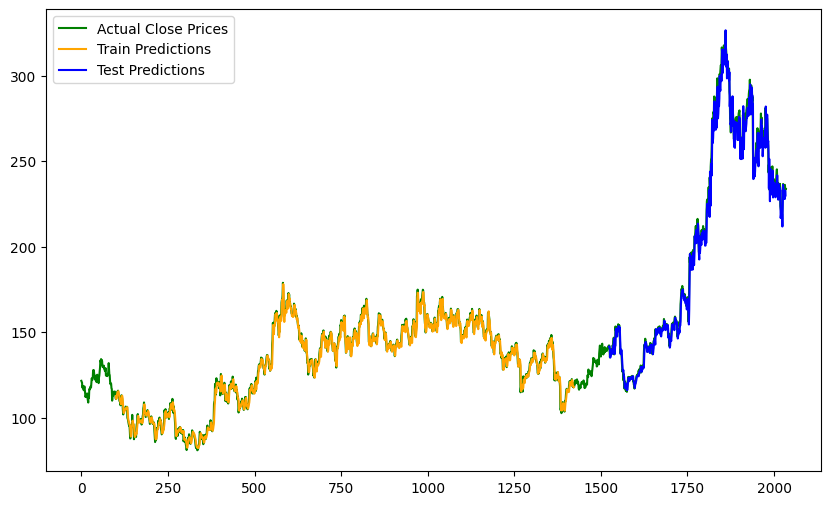

In [ ]:
# Define look_back here
look_back = 100

# Plot baseline and predictions
plt.figure(figsize=(10, 6))

# Plot the actual close prices in green
plt.plot(scaler.inverse_transform(close_prices), color='green', label='Actual Close Prices')

# Plot the train predictions in orange
trainPredictPlot = np.empty_like(close_prices)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
plt.plot(trainPredictPlot, color='orange', label='Train Predictions')

# Plot the test predictions in blue
testPredictPlot = np.empty_like(close_prices)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(close_prices) - 1, :] = test_predict
plt.plot(testPredictPlot, color='blue', label='Test Predictions')

plt.legend()
plt.show()



In [ ]:
len(test_data)

611

Now we need to predict the value for 30 days into the future.
Here, we take the last 100 values, which would be used as input for calculating the output for the next day.

In [ ]:
x_input=test_data[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
# converting to list
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

### Prediction for next 30 days

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        # get the 100 days data from the input list
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        # reshape the input to be fed to the model
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        # make the prediction
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        # add the current output to the list of outputs
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        # reshape the input data to feed it to the LSTM model
        x_input = x_input.reshape((1, n_steps,1))
        # make the prediction
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        # add the current output to the list of outputs
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.6106352]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 

In [ ]:
# initial 100 days
day_new=np.arange(1,101)
# next 30 days to be predicted
day_pred=np.arange(101,131)

In [ ]:
len(close_prices)

2035

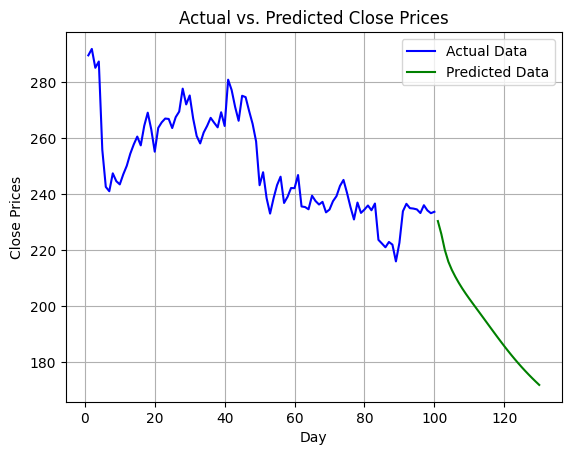

In [ ]:
# Plotting the actual data in blue
plt.plot(day_new, scaler.inverse_transform(close_prices[1935:]), color='blue', label='Actual Data')

# Plotting the predicted data in green
plt.plot(day_pred, scaler.inverse_transform(lst_output), color='green', label='Predicted Data')

plt.legend()  # Show the legend for better clarity
plt.xlabel('Day')
plt.ylabel('Close Prices')
plt.title('Actual vs. Predicted Close Prices')
plt.grid(True)  # Add grid lines for better visualization

plt.show()


 Conclusion :: The model's performance on the test data showcases its proficiency in capturing underlying patterns and trends in stock market data. This successful prediction process signifies the potential of the LSTM learning model to provide valuable insights into future stock price movements, making it a promising tool for investors and analysts seeking to better understand stock market dynamics.